In [1]:
import spike.spike_analysis.spike_collection as sc
import spike.spike_analysis.spike_recording as sr
import spike.spike_analysis.firing_rate_calculations as fr
import spike.spike_analysis.normalization as norm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import behavior.boris_extraction as boris
import matplotlib.pyplot as plt

# Spike Analysis

Two components of electrophyisology recordings are single unit spiking activity and local field potentials. This notebook is to allow familiarity with the Spike Recording and Spike Collection classes and their attributes. By the end of this notebook you should know how to:
1. initialize a spike recording object and spike collection
2. understand the data structure of an event dictionary, how to create one, and how to assign it as an attribute to a recording object
3. know key attributes of a spike recording object, their structures, and their conceptual meanings
4. know key methods of a spike recording object, their structures, and their concentpual meanings
5. know key attributes and methods of a spike collection object

### Check In:

Before continuing with this notebook, you should know what a dictionary, a pandas DataFrame, and a class are.

If this is the first time you are hearing this terminology, I would recommend famliarizing yourself with the above terms as well as:

- dictionary: key vs value
- class: attribute vs method 

## Spike Recording

In [2]:
%pwd

'c:\\Users\\tomhu\\Desktop\\diff_fam_social_memory_ephys'

### How it initiate a recording

In [3]:
# arugments: path = path to a phy folder in a merged.rec folder
path = r"./spike/tests/test_data/test_recording_merged.rec"
# sampling_rate = sampling rate of the recording usually 20000 for spikegadgets
sampling_rate = 20000

#This line initiates a spike recording object
example_recording1 = sr.SpikeRecording(path = path, sampling_rate = sampling_rate)




Unit 169 is unsorted & has 88 spikes
Unit 169 will be deleted


In [4]:
# the class deletes any units that have not been sorted like unit 169 
# to solve this issue, open up the phy folder in phy as you normally would an sort the remaining unsorted unit 
# save and rereun the code

# to see an overview of the recording, print it 
print(example_recording1)

SpikeRecording Summary:
  Recording: test_recording_merged.rec
  Subject: None
  Event Dict Assigned: False
  Recording Length: 39.51 minutes
     
Unit Overvew:
  Number of Good Units: 19
  Number of MUAs: 7




In [5]:
# please uncomment the line below an initiate a spike recording object 
# using the following merged.rec folder: test_rec2_merged.rec

#example_recording2 = 

### Assignment 1: Spike Recording Objects

In [6]:
print(example_recording1)

SpikeRecording Summary:
  Recording: test_recording_merged.rec
  Subject: None
  Event Dict Assigned: False
  Recording Length: 39.51 minutes
     
Unit Overvew:
  Number of Good Units: 19
  Number of MUAs: 7




In [7]:
#this will print out all attributes and methods of the class
dir(example_recording1)

['__check__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__freq_dictionary__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__spike_specs__',
 '__str__',
 '__subclasshook__',
 '__unit_firing_rates__',
 '__unit_labels__',
 '__unit_spiketrains__',
 '__unit_timestamps__',
 '__weakref__',
 '__whole_spiketrain__',
 'all_set',
 'analyze',
 'event_firing_rates',
 'event_snippets',
 'freq_dict',
 'good_neurons',
 'labels_dict',
 'name',
 'path',
 'phy',
 'sampling_rate',
 'set_event_dict',
 'set_subject',
 'timestamps_var',
 'unit_array',
 'unit_event_firing_rates',
 'unit_timestamps']

In [8]:
# Timestamps is an array where each element is an integer representing 
# the timestamp taken in the samplingrate (Hz) of all neurons.
# Assume the last timestamp is close/is the end of the recording. 
# Calculate how long the recording is in minutes given the sampling rate 
# and the last timestamp 

In [9]:
# Calculate the number of MUA units using the attributes of the recording


### Class Method 1: analyze()

In [10]:
# this class method will calculate firing rates for each unit in 1Hz (1/sec) using 100 ms timebins 
# it will ignore all units with a firing rate below ignore_freq (0.5Hz) 
# the firing rates are stored as attributes of the class

example_recording1.analyze(timebin=100, ignore_freq=0.5, smoothing_window=None)
print(example_recording1)

Cannot execute:test_recording_merged.rec is missing the following attributes:
['subject', 'event_dict']
SpikeRecording Summary:
  Recording: test_recording_merged.rec
  Subject: None
  Event Dict Assigned: False
  Recording Length: 39.51 minutes
     
Unit Overvew:
  Number of Good Units: 19
  Number of MUAs: 7
  Good units above ignore frequency: 13
     
Analysis Parameters:
  Timebin: 100s
  Ignore Frequency: 0.5Hz
  Smoothing Window: None




In [11]:
print(example_recording1.good_neurons)
print(example_recording1.analyzed_neurons)

19
13


In [12]:
# Which is greater: analyzed neurons or good neurons? Why?
# Hint: play with the ignore freq

In [13]:
# Calculate average firing rate for analyzed neurons 

In [14]:
# Sum of firing rates of neurons / Number of neurons 
print(example_recording1.unit_firing_rates)
print(example_recording1.freq_dict)

{'107': array([30., 10., 40., ..., 20., 30., 20.]), '2': array([10., 30., 50., ..., 30., 50., 10.]), '235': array([10.,  0.,  0., ..., 10.,  0.,  0.]), '61': array([ 0.,  0., 10., ..., 10., 10., 20.]), '75': array([0., 0., 0., ..., 0., 0., 0.]), '163': array([ 0.,  0.,  0., ..., 10., 10., 10.]), '104': array([0., 0., 0., ..., 0., 0., 0.]), '230': array([0., 0., 0., ..., 0., 0., 0.]), '167': array([0., 0., 0., ..., 0., 0., 0.]), '23': array([ 0.,  0.,  0., ...,  0., 10.,  0.]), '233': array([ 0.,  0.,  0., ...,  0.,  0., 10.]), '64': array([0., 0., 0., ..., 0., 0., 0.]), '108': array([ 0.,  0.,  0., ..., 20.,  0., 20.])}
{'107': 17.740752652717955, '2': 30.47533438876201, '235': 1.8894951997794196, '61': 13.605293522680522, '75': 0.5905990800828729, '163': 2.8264384546823202, '104': 1.4608890102335634, '229': 0.29487768355566296, '230': 0.9318809770736187, '167': 2.6096042209947514, '226': 0.05779433855096684, '23': 10.689421493014226, '233': 0.5159304821009668, '25': 0.1037766955002762

In [15]:
# What are the dimensions of the unit_firing_rate_array? 
# What does each dimension map to? What do they mean? 

In [16]:
print(f'array of timebins x units: {example_recording1.unit_firing_rate_array}')
print("The rows map to timebins, the columns match to units, \nthe values are firing rates")

array of timebins x units: [[30. 10. 10. ...  0.  0.  0.]
 [10. 30.  0. ...  0.  0.  0.]
 [40. 50.  0. ...  0.  0.  0.]
 ...
 [20. 30. 10. ...  0.  0. 20.]
 [30. 50.  0. ...  0.  0.  0.]
 [20. 10.  0. ... 10.  0. 20.]]
The rows map to timebins, the columns match to units, 
the values are firing rates


In [ ]:
# use this cell to analyze example_recording2 
path2 = r'C:\Users\tomhu\Desktop\diff_fam_social_memory_ephys\spike\tests\test_data\test_rec2_merged.rec'

# sampling_rate = sampling rate of the recording usually 20000 for spikegadgets
sampling_rate = 20000

#This line initiates a spike recording object
example_recording2 = sr.SpikeRecording(path = path2, sampling_rate = sampling_rate)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ADMIN\\Desktop\\Code\\diff_fam_social_memory_ephys\\spike\\tests\\test_data\\test_rec2_merged.rec\\phy\\cluster_group.tsv'

In [ ]:
# use this cell to analyze example_recording2 using a 50 ms timebin, ignore_freq of 0.5 Hz and a smoothing window of 250 ms 
example_recording2.analyze(timebin=50, ignore_freq=0.5, smoothing_window=250)
print(example_recording2)


# plot the average firing rate across all units for the recording and plot it over time 


Cannot execute:test_rec2_merged.rec is missing the following attributes:
['subject', 'event_dict']
SpikeRecording Summary:
  Recording: test_rec2_merged.rec
  Subject: None
  Event Dict Assigned: False
  Recording Length: 39.04 minutes
     
Unit Overvew:
  Number of Good Units: 12
  Number of MUAs: 7
  Good units above ignore frequency: 11
     
Analysis Parameters:
  Timebin: 50s
  Ignore Frequency: 0.5Hz
  Smoothing Window: 250




In [ ]:
fire_rates = example_recording2.unit_firing_rate_array

avg_fire_rate = np.nanmean(fire_rates, axis=1)

time_axis = np.arange(len(avg_fire_rate)) * example_recording2.timebin

print(example_recording2.timebin)

50


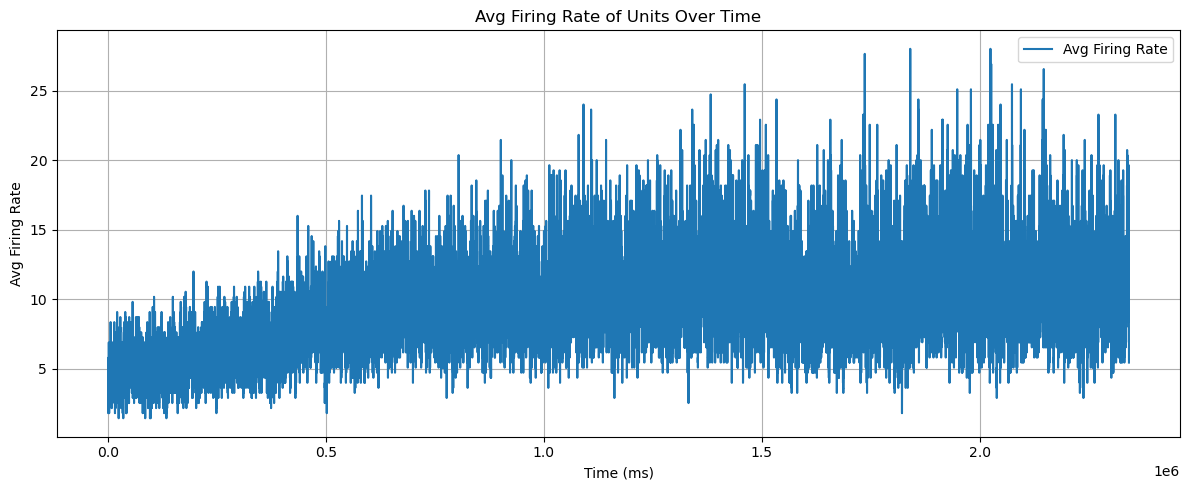

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(time_axis, avg_fire_rate, label='Avg Firing Rate')
plt.xlabel('Time (ms)')
plt.ylabel('Avg Firing Rate')
plt.title('Avg Firing Rate of Units Over Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Behavior

Each recording should have a subject and an event dictionary assigned to it. These attributes are not needed to initialize a spike recording object. However, for future data analysis, it very likely that you have some sort of behavioral outputs that you would like to compare within and across recordings. This notebook shows you how an event dictionary should be constructed and shows you an easy way to do so with a boris csv. 

The structure of the event dictionary should maintain across behavioral measures from various sources such as SLEAP, Med-PC outputs, Anymaze, etc. 

In [ ]:
# Example event_dict 

ex_event_dict = {'event1': np.array([[50,140], [200, 300], [400, 500]]), 'event2': np.array([[100, 200], [300, 400], [500, 600], [700, 800]])}

# each key is the name of an event or behavior 
# each value is an n x 2 numpy array 

print(ex_event_dict['event1'].shape) 
# where n is the number of events and 2 is the start and stop time of an event in ms

print(ex_event_dict['event2'].shape) 


(3, 2)
(4, 2)


### From Boris to Event_Dict

In [ ]:
# here is an example boris csv that is associated with test_recording_merged.rec

example_recording_behavior = pd.read_csv(r"spike\tests\test_data\test_recording_behavior.csv")
example_recording_behavior

,Observation id,Observation date,Description,Observation type,Source,Time offset (s),Coding duration,Media duration (s),FPS (frame/s),Subject,...,Start (s),Stop (s),Duration (s),Media file name,Image index start,Image index stop,Image file path start,Image file path stop,Comment start,Comment stop
0,11_cage_p1 Achziger,2024-09-23 16:44:11.116,Anastasia Achziger BORIS 11_cage_p1,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,1729.733,2370.733,15.0,No focal subject,...,630.600,630.600,NaN,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/11_ca...,9459,9459.0,NaN,NaN,NaN,NaN
1,11_cage_p1 Achziger,2024-09-23 16:44:11.116,Anastasia Achziger BORIS 11_cage_p1,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,1729.733,2370.733,15.0,subject,...,631.800,632.866,1.066,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/11_ca...,9477,NaN,NaN,NaN,NaN,NaN
2,11_cage_p1 Achziger,2024-09-23 16:44:11.116,Anastasia Achziger BORIS 11_cage_p1,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,1729.733,2370.733,15.0,social_agent,...,631.867,632.733,0.866,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/11_ca...,9478,9491.0,NaN,NaN,NaN,NaN
3,11_cage_p1 Achziger,2024-09-23 16:44:11.116,Anastasia Achziger BORIS 11_cage_p1,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,1729.733,2370.733,15.0,subject,...,632.867,635.467,2.600,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/11_ca...,9493,9532.0,NaN,NaN,NaN,NaN
4,11_cage_p1 Achziger,2024-09-23 16:44:11.116,Anastasia Achziger BORIS 11_cage_p1,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,1729.733,2370.733,15.0,subject,...,636.533,640.000,3.467,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/11_ca...,9548,9600.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,11_cage_p1 Achziger,2024-09-23 16:44:11.116,Anastasia Achziger BORIS 11_cage_p1,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,1729.733,2370.733,15.0,social_agent,...,2327.933,2329.067,1.134,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/11_ca...,34919,34936.0,NaN,NaN,NaN,NaN
314,11_cage_p1 Achziger,2024-09-23 16:44:11.116,Anastasia Achziger BORIS 11_cage_p1,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,1729.733,2370.733,15.0,social_agent,...,2331.400,2332.132,0.732,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/11_ca...,34971,NaN,NaN,NaN,NaN,NaN
315,11_cage_p1 Achziger,2024-09-23 16:44:11.116,Anastasia Achziger BORIS 11_cage_p1,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,1729.733,2370.733,15.0,social_agent,...,2332.133,2336.533,4.400,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/11_ca...,34982,35048.0,NaN,NaN,NaN,NaN
316,11_cage_p1 Achziger,2024-09-23 16:44:11.116,Anastasia Achziger BORIS 11_cage_p1,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,1729.733,2370.733,15.0,social_agent,...,2355.867,2356.799,0.932,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/11_ca...,35338,NaN,NaN,NaN,NaN,NaN


In [ ]:
# using the helper function get_behavior_bouts from the script boris_extraction.py
# we can extract the start and stop times of behaviors in the above dataframe and output them 
# in a n x 2 numpy array

sniffing_bouts = boris.get_behavior_bouts(example_recording_behavior, #dataframe made frm the boris csv
                                          subject=['subject'], #a list of the subjects whose behavior you want (will be combined)
                                          behavior=['facial sniffing', 'anogenital sniffing'], #a list of the behaviors you want (will be combined)
                                          min_iti = 1, #min iti between events, if < min_iti, events will be combined
                                          min_bout= 0.5 #min bout, bouts < min_bout will be deleted 
                                          ) 

print(type(sniffing_bouts))
print(sniffing_bouts.shape)

#in order for the event_dict to be ready to be assigned, it needs to be in dictionary form
sniffing_dict = {'sniff': sniffing_bouts}



<class 'numpy.ndarray'>
(50, 2)


In [ ]:
# in order to assign a subject and event_dict, the attributes need to be assigned to recording object as such: 

example_recording1.set_subject('1.1')
example_recording1.set_event_dict(sniffing_dict)

print(example_recording1)

SpikeRecording Summary:
  Recording: test_recording_merged.rec
  Subject: 1.1
  Event Dict Assigned: True
  Recording Length: 39.51 minutes
     
Unit Overvew:
  Number of Good Units: 19
  Number of MUAs: 7
  Good units above ignore frequency: 13
     
Analysis Parameters:
  Timebin: 100s
  Ignore Frequency: 0.5Hz
  Smoothing Window: None

Event Overview:
  sniff: 50 events



In [ ]:
# now lets edit the behavior dictionary slightly using specifics from the example_recording_behavior dataframe
# using mouse in and mouse out times we will cut the behavior dataframe into 5 exposure epochs 

mouse_in = np.array(example_recording_behavior[example_recording_behavior['Behavior'] == 'mice back in']['Start (s)'].tolist())
mouse_out = np.array(example_recording_behavior[example_recording_behavior['Behavior'] == 'mice taken out']['Start (s)'].tolist())

print(mouse_in)  # these are times (in ms) when a social stimuli was placed into the arena
print(mouse_out) # and then taken out of the arena 

[ 630.6    992.467 1352.733 1713.    2073.4  ]
[ 931.667 1290.733 1649.467 2011.4  ]


In [ ]:
# using thos etimes, lets separate the behavior dataframe into the five exposures 
exp1_df = example_recording_behavior[
    (example_recording_behavior['Start (s)'] > mouse_in[0]) &
    (example_recording_behavior['Start (s)'] < mouse_out[0])]
exp1_df

,Observation id,Observation date,Description,Observation type,Source,Time offset (s),Coding duration,Media duration (s),FPS (frame/s),Subject,...,Start (s),Stop (s),Duration (s),Media file name,Image index start,Image index stop,Image file path start,Image file path stop,Comment start,Comment stop
1,11_cage_p1 Achziger,2024-09-23 16:44:11.116,Anastasia Achziger BORIS 11_cage_p1,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,1729.733,2370.733,15.0,subject,...,631.800,632.866,1.066,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/11_ca...,9477,NaN,NaN,NaN,NaN,NaN
2,11_cage_p1 Achziger,2024-09-23 16:44:11.116,Anastasia Achziger BORIS 11_cage_p1,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,1729.733,2370.733,15.0,social_agent,...,631.867,632.733,0.866,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/11_ca...,9478,9491.0,NaN,NaN,NaN,NaN
3,11_cage_p1 Achziger,2024-09-23 16:44:11.116,Anastasia Achziger BORIS 11_cage_p1,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,1729.733,2370.733,15.0,subject,...,632.867,635.467,2.600,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/11_ca...,9493,9532.0,NaN,NaN,NaN,NaN
4,11_cage_p1 Achziger,2024-09-23 16:44:11.116,Anastasia Achziger BORIS 11_cage_p1,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,1729.733,2370.733,15.0,subject,...,636.533,640.000,3.467,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/11_ca...,9548,9600.0,NaN,NaN,NaN,NaN
5,11_cage_p1 Achziger,2024-09-23 16:44:11.116,Anastasia Achziger BORIS 11_cage_p1,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,1729.733,2370.733,15.0,subject,...,643.333,644.733,1.400,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/11_ca...,9650,9671.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,11_cage_p1 Achziger,2024-09-23 16:44:11.116,Anastasia Achziger BORIS 11_cage_p1,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,1729.733,2370.733,15.0,subject,...,897.867,898.000,0.133,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/11_ca...,13468,13470.0,NaN,NaN,NaN,NaN
72,11_cage_p1 Achziger,2024-09-23 16:44:11.116,Anastasia Achziger BORIS 11_cage_p1,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,1729.733,2370.733,15.0,social_agent,...,919.667,920.467,0.800,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/11_ca...,13795,13807.0,NaN,NaN,NaN,NaN
73,11_cage_p1 Achziger,2024-09-23 16:44:11.116,Anastasia Achziger BORIS 11_cage_p1,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,1729.733,2370.733,15.0,social_agent,...,924.733,925.267,0.534,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/11_ca...,13871,13879.0,NaN,NaN,NaN,NaN
74,11_cage_p1 Achziger,2024-09-23 16:44:11.116,Anastasia Achziger BORIS 11_cage_p1,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,1729.733,2370.733,15.0,social_agent,...,926.533,927.600,1.067,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/11_ca...,13898,13914.0,NaN,NaN,NaN,NaN


In [ ]:
exp2_df = example_recording_behavior[
    (example_recording_behavior['Start (s)'] > mouse_in[1]) &
    (example_recording_behavior['Start (s)'] < mouse_out[1])]
exp3_df = example_recording_behavior[
    (example_recording_behavior['Start (s)'] > mouse_in[2]) &
    (example_recording_behavior['Start (s)'] < mouse_out[2])]
exp4_df = example_recording_behavior[
    (example_recording_behavior['Start (s)'] > mouse_in[3]) &
    (example_recording_behavior['Start (s)'] < mouse_out[3])]
exp5_df = example_recording_behavior[
    (example_recording_behavior['Start (s)'] > mouse_in[4])]

In [ ]:
#using the same function as above lets put the behaviors into arrays
subject =['subject']
behavior = ['facial sniffing', 'anogenital sniffing']
min_iti = 1 
min_bout = 0.5
exp1 = boris.get_behavior_bouts(exp1_df,subject = subject, behavior = behavior, min_iti = min_iti, min_bout=min_bout)
exp2 = boris.get_behavior_bouts(exp2_df,subject = subject, behavior = behavior, min_iti = min_iti, min_bout=min_bout)
exp3 = boris.get_behavior_bouts(exp3_df,subject = subject, behavior = behavior, min_iti = min_iti, min_bout=min_bout)
exp4 = boris.get_behavior_bouts(exp4_df,subject = subject, behavior = behavior, min_iti = min_iti, min_bout=min_bout)
exp5 = boris.get_behavior_bouts(exp5_df,subject = subject, behavior = behavior, min_iti = min_iti, min_bout=min_bout)



In [ ]:
#and now lets put them into a dictionart
sniffing_dict = {'exp1': exp1,
                 'exp2': exp2,
                 'exp3': exp3,
                 'exp4': exp4,
                 'exp5': exp5}
example_recording1.event_dict = sniffing_dict

In [ ]:
print(example_recording1)

SpikeRecording Summary:
  Recording: test_recording_merged.rec
  Subject: 1.1
  Event Dict Assigned: True
  Recording Length: 39.51 minutes
     
Unit Overvew:
  Number of Good Units: 19
  Number of MUAs: 7
  Good units above ignore frequency: 13
     
Analysis Parameters:
  Timebin: 100s
  Ignore Frequency: 0.5Hz
  Smoothing Window: None

Event Overview:
  exp1: 21 events
  exp2: 7 events
  exp3: 7 events
  exp4: 10 events
  exp5: 5 events



### Assignment 2: Behavior

In [ ]:
# using the mouse in and mouse out times to sepearate the behavior dataframe into 5 exposures
# then put the 5 exposure data sets into arrays into a dictionary and assign the event_dict
# to example_recording2, and then assign a subject (could be any string)

behavior2_path = r"spike\tests\test_data\test_recording_behavior.csv"

behavior2 = pd.read_csv(behavior2_path)
behavior2

,Observation id,Observation date,Description,Observation type,Source,Time offset (s),Coding duration,Media duration (s),FPS (frame/s),Subject,...,Start (s),Stop (s),Duration (s),Media file name,Image index start,Image index stop,Image file path start,Image file path stop,Comment start,Comment stop
0,11_cage_p1 Achziger,2024-09-23 16:44:11.116,Anastasia Achziger BORIS 11_cage_p1,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,1729.733,2370.733,15.0,No focal subject,...,630.600,630.600,NaN,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/11_ca...,9459,9459.0,NaN,NaN,NaN,NaN
1,11_cage_p1 Achziger,2024-09-23 16:44:11.116,Anastasia Achziger BORIS 11_cage_p1,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,1729.733,2370.733,15.0,subject,...,631.800,632.866,1.066,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/11_ca...,9477,NaN,NaN,NaN,NaN,NaN
2,11_cage_p1 Achziger,2024-09-23 16:44:11.116,Anastasia Achziger BORIS 11_cage_p1,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,1729.733,2370.733,15.0,social_agent,...,631.867,632.733,0.866,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/11_ca...,9478,9491.0,NaN,NaN,NaN,NaN
3,11_cage_p1 Achziger,2024-09-23 16:44:11.116,Anastasia Achziger BORIS 11_cage_p1,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,1729.733,2370.733,15.0,subject,...,632.867,635.467,2.600,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/11_ca...,9493,9532.0,NaN,NaN,NaN,NaN
4,11_cage_p1 Achziger,2024-09-23 16:44:11.116,Anastasia Achziger BORIS 11_cage_p1,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,1729.733,2370.733,15.0,subject,...,636.533,640.000,3.467,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/11_ca...,9548,9600.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,11_cage_p1 Achziger,2024-09-23 16:44:11.116,Anastasia Achziger BORIS 11_cage_p1,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,1729.733,2370.733,15.0,social_agent,...,2327.933,2329.067,1.134,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/11_ca...,34919,34936.0,NaN,NaN,NaN,NaN
314,11_cage_p1 Achziger,2024-09-23 16:44:11.116,Anastasia Achziger BORIS 11_cage_p1,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,1729.733,2370.733,15.0,social_agent,...,2331.400,2332.132,0.732,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/11_ca...,34971,NaN,NaN,NaN,NaN,NaN
315,11_cage_p1 Achziger,2024-09-23 16:44:11.116,Anastasia Achziger BORIS 11_cage_p1,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,1729.733,2370.733,15.0,social_agent,...,2332.133,2336.533,4.400,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/11_ca...,34982,35048.0,NaN,NaN,NaN,NaN
316,11_cage_p1 Achziger,2024-09-23 16:44:11.116,Anastasia Achziger BORIS 11_cage_p1,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,1729.733,2370.733,15.0,social_agent,...,2355.867,2356.799,0.932,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/11_ca...,35338,NaN,NaN,NaN,NaN,NaN


In [ ]:
mouse2_in = np.array(behavior2[behavior2['Behavior']=='mice back in']['Start (s)'].to_list())
mouse2_out = np.array(behavior2[behavior2['Behavior']=='mice taken out']['Start (s)'].to_list())
print(mouse2_in)
print(mouse2_out)

[ 630.6    992.467 1352.733 1713.    2073.4  ]
[ 931.667 1290.733 1649.467 2011.4  ]


In [ ]:
exp1_df = example_recording_behavior[
    (example_recording_behavior['Start (s)'] > mouse2_in[0]) &
    (example_recording_behavior['Start (s)'] < mouse2_out[0])]

exp2_df = example_recording_behavior[
    (example_recording_behavior['Start (s)'] > mouse2_in[1]) &
    (example_recording_behavior['Start (s)'] < mouse2_out[1])]

exp3_df = example_recording_behavior[
    (example_recording_behavior['Start (s)'] > mouse2_in[2]) &
    (example_recording_behavior['Start (s)'] < mouse2_out[2])]

exp4_df = example_recording_behavior[
    (example_recording_behavior['Start (s)'] > mouse2_in[3]) &
    (example_recording_behavior['Start (s)'] < mouse2_out[3])]

exp5_df = example_recording_behavior[
    (example_recording_behavior['Start (s)'] > mouse2_in[4])]


In [ ]:
#using the same function as above lets put the behaviors into arrays
subject =['subject']
behavior = ['facial sniffing', 'anogenital sniffing']
min_iti = 1 
min_bout = 0.5
exp1 = boris.get_behavior_bouts(exp1_df,subject = subject, behavior = behavior, min_iti = min_iti, min_bout=min_bout)
exp2 = boris.get_behavior_bouts(exp2_df,subject = subject, behavior = behavior, min_iti = min_iti, min_bout=min_bout)
exp3 = boris.get_behavior_bouts(exp3_df,subject = subject, behavior = behavior, min_iti = min_iti, min_bout=min_bout)
exp4 = boris.get_behavior_bouts(exp4_df,subject = subject, behavior = behavior, min_iti = min_iti, min_bout=min_bout)
exp5 = boris.get_behavior_bouts(exp5_df,subject = subject, behavior = behavior, min_iti = min_iti, min_bout=min_bout)


In [ ]:
in_out = {
	'exp1': exp1,
	'exp2': exp2,
	'exp3': exp3,
	'exp4': exp4,
	'exp5': exp5,
}

In [ ]:
example_recording2.event_dict = in_out
print(example_recording2)

SpikeRecording Summary:
  Recording: test_rec2_merged.rec
  Subject: None
  Event Dict Assigned: True
  Recording Length: 39.04 minutes
     
Unit Overvew:
  Number of Good Units: 12
  Number of MUAs: 7
  Good units above ignore frequency: 11
     
Analysis Parameters:
  Timebin: 50s
  Ignore Frequency: 0.5Hz
  Smoothing Window: 250

Event Overview:
  exp1: 21 events
  exp2: 7 events
  exp3: 7 events
  exp4: 10 events
  exp5: 5 events



In [ ]:
behavior2['Behavior'].unique()
#example_recording_behavior['Behavior'].unique()

array(['mice back in', 'facial sniffing', 'anogenital sniffing',
       'mice taken out', 'fighting', 'chasing'], dtype=object)

In [ ]:
fighting = behavior2[behavior2['Behavior'] == 'fighting']
fighting.head(5)

,Observation id,Observation date,Description,Observation type,Source,Time offset (s),Coding duration,Media duration (s),FPS (frame/s),Subject,...,Start (s),Stop (s),Duration (s),Media file name,Image index start,Image index stop,Image file path start,Image file path stop,Comment start,Comment stop
112,11_cage_p1 Achziger,2024-09-23 16:44:11.116,Anastasia Achziger BORIS 11_cage_p1,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,1729.733,2370.733,15.0,social_agent,...,1145.400,1146.600,1.200,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/11_ca...,17181,17199.0,NaN,NaN,NaN,NaN
118,11_cage_p1 Achziger,2024-09-23 16:44:11.116,Anastasia Achziger BORIS 11_cage_p1,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,1729.733,2370.733,15.0,social_agent,...,1163.467,1175.467,12.000,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/11_ca...,17452,17632.0,NaN,NaN,NaN,NaN
120,11_cage_p1 Achziger,2024-09-23 16:44:11.116,Anastasia Achziger BORIS 11_cage_p1,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,1729.733,2370.733,15.0,social_agent,...,1178.133,1208.133,30.000,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/11_ca...,17672,18122.0,NaN,NaN,NaN,NaN
135,11_cage_p1 Achziger,2024-09-23 16:44:11.116,Anastasia Achziger BORIS 11_cage_p1,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,1729.733,2370.733,15.0,social_agent,...,1277.467,1278.266,0.799,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/11_ca...,19162,NaN,NaN,NaN,NaN,NaN
137,11_cage_p1 Achziger,2024-09-23 16:44:11.116,Anastasia Achziger BORIS 11_cage_p1,Media file,player #1:C:/Users/niuni/Downloads/MOUSE LAB/B...,0.0,1729.733,2370.733,15.0,social_agent,...,1280.667,1281.533,0.866,C:/Users/niuni/Downloads/MOUSE LAB/BORIS/11_ca...,19210,19223.0,NaN,NaN,NaN,NaN


# Comment - Fighting/Chasing only in social agent

In [ ]:
# use the boris.get_behavior_bouts function to extract chasing and fighting its own event ('neg social')
behavior = ['fighting', 'chasing']
subject = ['social_agent']
chase_fight = boris.get_behavior_bouts(behavior2, subject=subject, behavior=behavior, min_iti=min_iti, min_bout=min_bout)
print(chase_fight.shape)

(24, 2)


In [ ]:
# what unit of time is in the above csv? 
print(f'Unit of time is seconds')
# what unit of time is the numpy array required to be in for an event_dict?
print('The same as the csv')

Unit of time is seconds
The same as the csv


## Spike Recording Methods

There are three class methods you can use after the method analyze and after an event dictionary has been assigned to the recording. 

In [ ]:
unit_event_firing_rates = example_recording1.unit_event_firing_rates(event='exp1',
                                                                     event_length= 3,
                                                                     pre_window=1)

type(unit_event_firing_rates)

dict

In [ ]:
event_firing_rates = example_recording1.event_firing_rates(event='exp1',
                                                           event_length = 3, 
                                                           pre_window= 1)
print(event_firing_rates.shape)

(21, 40, 13)


In [ ]:
# what do each of the dimensions in the above array represent?
print('3 numpy arrays made up of event, timebin, units with length no of events')

3 numpy arrays made up of event, timebin, units with length no of events


In [ ]:
# event snippets is the most basic and flexible method that underlies the above two 
# it takes in all the same arguments plus a whole_self argument 
# such that you can use it one the whole self firing rate array

event_firing_rates = example_recording1.event_snippets(event='exp1',whole_self= example_recording1.unit_firing_rate_array, event_length=3, pre_window=1)

In [ ]:
# a specific units firing rates

event_fr_107 = example_recording1.event_snippets(event='exp1',whole_self= example_recording1.unit_firing_rates['107'], event_length=3, pre_window=1)

In [ ]:
# or even the spike train for a specific unit
# in this case the spike trian is still in the unis of specified in the analyze method

event_spike_trains_107 = example_recording1.event_snippets('exp1', example_recording1.unit_spiketrains['107'], 3, 1)
print(example_recording1.timebin)
print(len(event_spike_trains_107[0]))

100
40


### SpikeTrain - how many spikes in a given timebin: 010101 1=spike at time at index from timestamps, timebin=100ms, 4 sec window, ouput=3

### Assignment 3: Event Firing Rates

In [ ]:
# use this cell to print out the spike trian of unit 107 for the 3rd sniffing bout in exp 1
print(event_spike_trains_107[2])

[4 6 6 2 4 4 3 3 4 5 7 1 2 3 5 4 1 1 2 5 5 7 4 5 5 6 6 4 2 4 5 4 3 6 3 4 3
 8 5 3]


In [ ]:
# use this cell to print out the firing rate of unit 107 for the 3rd sniffing bout in exp 1
# using event_fr_107
print(event_fr_107[2])

[40. 60. 60. 20. 40. 40. 30. 30. 40. 50. 70. 10. 20. 30. 50. 40. 10. 10.
 20. 50. 50. 70. 40. 50. 50. 60. 60. 40. 20. 40. 50. 40. 30. 60. 30. 40.
 30. 80. 50. 30.]


In [ ]:
# how many spikes did unit 107 have between 400 - 700 ms of the 3rd sniffing bout?
print(event_spike_trains_107[2][3:6].sum())

np.int64(10)

In [ ]:
#analyze example_recording2 using your own desired timebin, ignore_freq, and smoothing window

#example_recording2.analyze(...)

example_recording2.analyze(timebin=150, ignore_freq=.5, smoothing_window=None)

Cannot execute:test_rec2_merged.rec is missing the following attributes:
['subject']


In [ ]:
# use this cell to calculate the firing rates of all units for sniffing during exp 1, 4, and 5 
# for example_recording2

# firing_rates_exp1 =
# firing_rates_exp4 =
# firing_rates_exp5 = 

In [ ]:
# which exposure has the highest average firing rate across all units?

In [ ]:
# which exposure has the highest average firing rate for unit 8?



## Spike Collection

A spike collection is a collection of spike recording objects. To initiate a collection is very similar to a recording.

In [ ]:
#arugments are the path the folder with all the merged.rec folders and the sampling rate in Hz
path = r"./spike/tests/test_data"
sampling_rate = 20000


example_collection = sc.SpikeCollection(path = path,sampling_rate= sampling_rate)

loading  test_rec2_merged.rec


loading  test_recording_merged.rec
Unit 169 is unsorted & has 88 spikes
Unit 169 will be deleted
loading  test_rec_fewgoodunits_merged.rec
loading  test_rec_nogoodunits_merged.rec
test_rec_nogoodunits_merged.rec has no good units
and will not be included in the collection
Please assign event dictionaries to each recording
as recording.event_dict
event_dict = {event name(str): np.array[[start(ms), stop(ms)]...]
Please assign subjects to each recording as recording.subject


In [ ]:
print(example_collection)

SpikeCollection Summary:
  Number of Recordings: 3
  Average Number of Good Units: 11.00
  Average Number of Events per Event Type: N/A
  Missing Subjects for Recordings: ['test_rec2_merged.rec', 'test_recording_merged.rec', 'test_rec_fewgoodunits_merged.rec']




In [ ]:
example_collection.recording_details()

Recording Details:

Recording: test_rec2_merged.rec
  Subject: Unknown
  Number of Good Units: 12
  Recording Length: 39.04 minutes
  Events per Event Type: {}

Recording: test_recording_merged.rec
  Subject: Unknown
  Number of Good Units: 19
  Recording Length: 39.51 minutes
  Events per Event Type: {}

Recording: test_rec_fewgoodunits_merged.rec
  Subject: Unknown
  Number of Good Units: 2
  Recording Length: 39.03 minutes
  Events per Event Type: {}



In [ ]:
for recording in example_collection.recordings:
    print(recording.name)
    print(recording.labels_dict)

test_rec2_merged.rec
{'2': 'mua', '3': 'noise', '8': 'good', '9': 'good', '10': 'good', '12': 'good', '22': 'mua', '23': 'good', '42': 'mua', '47': 'good', '48': 'good', '49': 'noise', '56': 'mua', '67': 'good', '68': 'mua', '69': 'noise', '73': 'mua', '74': 'noise', '82': 'good', '89': 'noise', '90': 'noise', '92': 'mua', '95': 'good', '102': 'good', '103': 'good'}
test_recording_merged.rec
{'2': 'good', '13': 'noise', '22': 'good', '23': 'good', '25': 'good', '53': 'mua', '58': 'mua', '61': 'good', '64': 'good', '72': 'mua', '75': 'good', '85': 'noise', '104': 'good', '105': 'noise', '106': 'mua', '107': 'good', '108': 'good', '138': 'mua', '148': 'good', '151': 'noise', '152': 'good', '161': 'noise', '163': 'good', '167': 'good', '224': 'noise', '226': 'good', '229': 'good', '230': 'good', '232': 'mua', '233': 'good', '234': 'mua', '235': 'good'}
test_rec_fewgoodunits_merged.rec
{'0': 'mua', '1': 'good', '2': 'mua', '3': 'good', '4': 'mua', '5': 'mua'}


### Assignment 4: Spike Collection

In [ ]:
# optional arguments are event and subject dictionaries 
# finish these dictionaries and try to initiate a spike collection object with them
# subjects can be whatever you want as long as they are entered as strings


# event_dict = {'test_rec2_merged.rec': ...,
#                    'test_recording_merged.rec': ...,
#                    'test_rec_fewgoodunits_merged.rec': ...}

# subject_dict = {'test_rec2_merged.rec': ...,
#                    'test_recording_merged.rec': ...,
#                    'test_rec_fewgoodunits_merged.rec': ...}


# hint: you need to create an event_dict for test_rec_fewgoodunits_merged.rec first

In [ ]:
# reinitiate a spike colleciton in this cell

# final_collection = 